<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/FilePreDictHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Các loài hoa: ['hoacuc', 'hoavang', 'champaka', 'sunflower', 'Hibiscus']
Found 2519 files belonging to 5 classes.
Using 2016 files for training.
Found 2519 files belonging to 5 classes.
Using 503 files for validation.
Tên lớp: ['Hibiscus', 'champaka', 'hoacuc', 'hoavang', 'sunflower']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.4340 - loss: 1.3926 - val_accuracy: 0.6501 - val_loss: 0.8007
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6147 - loss: 0.8279 - val_accuracy: 0.7435 - val_loss: 0.6692
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7152 - loss: 0.6824 - val_accuracy: 0.7316 - val_loss: 0.6211
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7727 - loss: 0.5512 - val_accuracy: 0.7813 - val_loss: 0.5126
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7999 - loss: 0.4762 - val_accuracy: 0.7654 - val_loss: 0.4875
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8209 - loss: 0.3997 - val_accuracy: 0.7853 - val_loss: 0.4632
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8200 - loss: 0.3990 - val_accuracy: 0.7694 - val_loss: 0.5008
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8418 - loss: 0.3192 - val_accuracy: 0.7833 - v

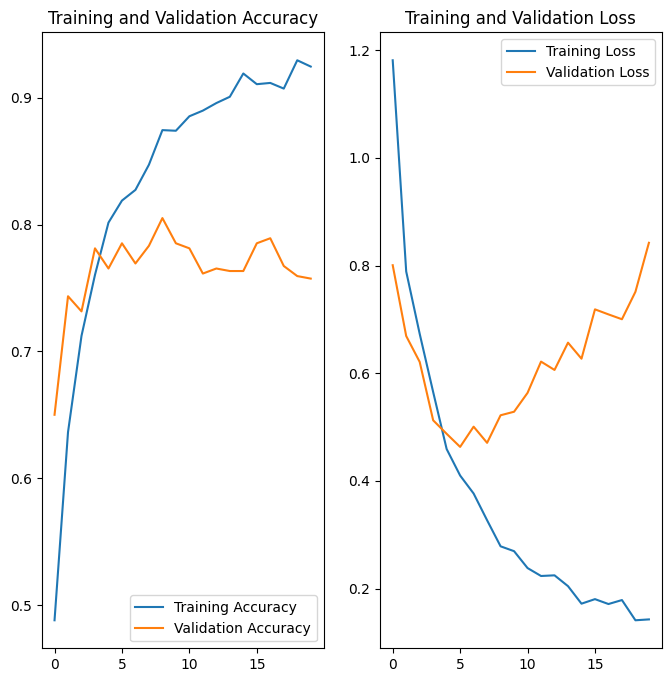

Nhãn thực tế: champaka
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Dự đoán: champaka (Độ tin cậy: 1.00)
Mô hình đã được lưu vào /content/drive/MyDrive/flower_recognition_model.h5


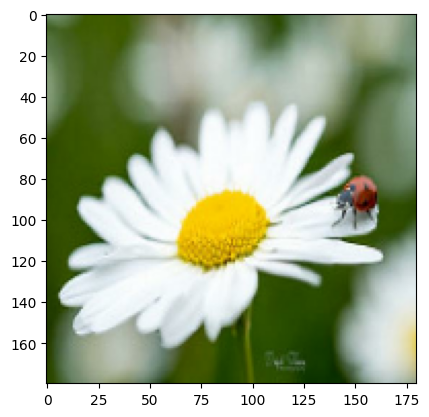

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split

main_dir = '/content/drive/MyDrive/Flower_Dataset'

class_names = os.listdir(main_dir)
print("Các loài hoa:", class_names)

image_size = (180, 180)
batch_size = 32

train_ds = image_dataset_from_directory(
    main_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = image_dataset_from_directory(
    main_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

print("Tên lớp:", train_ds.class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

import numpy as np

image_batch, labels_batch = next(iter(val_ds))

first_image = image_batch[0].numpy().astype("uint8")
first_label = labels_batch[0].numpy()

plt.imshow(first_image)
print("Nhãn thực tế:", class_names[np.argmax(first_label)])

prediction = model.predict(np.expand_dims(first_image, axis=0))
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print(f"Dự đoán: {predicted_class} (Độ tin cậy: {confidence:.2f})")

model.save('/content/drive/MyDrive/flower_recognition_model.h5')
print("Mô hình đã được lưu vào /content/drive/MyDrive/flower_recognition_model.h5")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,623 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Mô hình đã được tải thành công!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Dự đoán: sunflower (Độ tin cậy: 1.00)


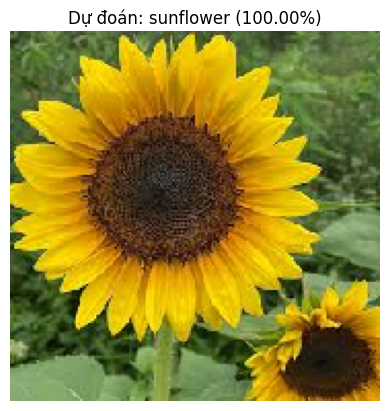

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = '/content/drive/MyDrive/flower_recognition_model.h5'

try:
    loaded_model = load_model(model_path)
    loaded_model.summary()
    print("Mô hình đã được tải thành công!")
except Exception as e:
    print(f"Lỗi khi tải mô hình: {e}")
    exit()

class_names = ['hoacuc', 'hoavang', 'champaka', 'sunflower', 'Hibiscus']

def load_and_preprocess_image(img_path, target_size=(180, 180)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi tải và tiền xử lý ảnh: {e}")
        return None

def predict_flower(model, img_array, class_names):
    if img_array is not None:
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence = predictions[0][predicted_class_index]
        predicted_class_name = class_names[predicted_class_index]
        print(f"Dự đoán: {predicted_class_name} (Độ tin cậy: {confidence:.2f})")

        plt.imshow(image.array_to_img(img_array[0]))
        plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()
    else:
        print("Không thể thực hiện dự đoán do lỗi tải ảnh.")

image_to_predict_path = '/content/sunflower.jpg'

processed_image = load_and_preprocess_image(image_to_predict_path, target_size=(180, 180))

predict_flower(loaded_model, processed_image, class_names)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,623 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Mô hình đã được tải thành công!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Dự đoán: sunflower (Độ tin cậy: 1.00)


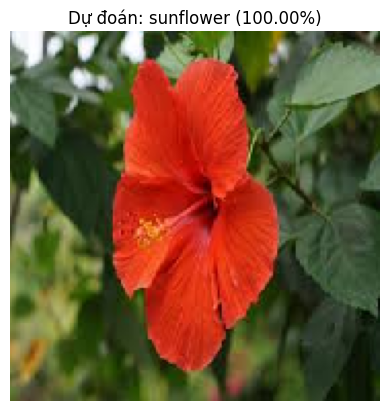

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = '/content/drive/MyDrive/flower_recognition_model.h5'

try:
    loaded_model = load_model(model_path)
    loaded_model.summary()
    print("Mô hình đã được tải thành công!")
except Exception as e:
    print(f"Lỗi khi tải mô hình: {e}")
    exit()

class_names = ['hoacuc', 'hoavang', 'champaka', 'sunflower', 'Hibiscus']

def load_and_preprocess_image(img_path, target_size=(180, 180)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi tải và tiền xử lý ảnh: {e}")
        return None

def predict_flower(model, img_array, class_names):
    if img_array is not None:
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence = predictions[0][predicted_class_index]
        predicted_class_name = class_names[predicted_class_index]
        print(f"Dự đoán: {predicted_class_name} (Độ tin cậy: {confidence:.2f})")

        plt.imshow(image.array_to_img(img_array[0]))
        plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()
    else:
        print("Không thể thực hiện dự đoán do lỗi tải ảnh.")

image_to_predict_path = '/content/hibisscuss.jpg'

processed_image = load_and_preprocess_image(image_to_predict_path, target_size=(180, 180))

predict_flower(loaded_model, processed_image, class_names)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,623 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Mô hình đã được tải thành công!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Dự đoán: sunflower (Độ tin cậy: 1.00)


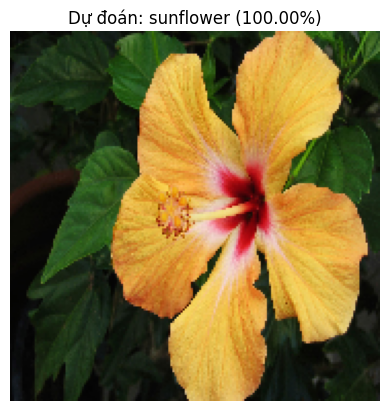

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = '/content/drive/MyDrive/flower_recognition_model.h5'

try:
    loaded_model = load_model(model_path)
    loaded_model.summary()
    print("Mô hình đã được tải thành công!")
except Exception as e:
    print(f"Lỗi khi tải mô hình: {e}")
    exit()

class_names = ['hoacuc', 'hoavang', 'champaka', 'sunflower', 'Hibiscus']

def load_and_preprocess_image(img_path, target_size=(180, 180)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi tải và tiền xử lý ảnh: {e}")
        return None

def predict_flower(model, img_array, class_names):
    if img_array is not None:
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence = predictions[0][predicted_class_index]
        predicted_class_name = class_names[predicted_class_index]
        print(f"Dự đoán: {predicted_class_name} (Độ tin cậy: {confidence:.2f})")

        plt.imshow(image.array_to_img(img_array[0]))
        plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()
    else:
        print("Không thể thực hiện dự đoán do lỗi tải ảnh.")

image_to_predict_path = '/content/qcaFgEgbhTzdJZpN8f8fHY.jpg'

processed_image = load_and_preprocess_image(image_to_predict_path, target_size=(180, 180))

predict_flower(loaded_model, processed_image, class_names)